<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/Association_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [46]:
df = pd.read_excel("https://raw.githubusercontent.com/Micahgs/DATA-science-asiignment-datasets/main/Online%20retail.xlsx", header= None)
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


# **EDA**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [48]:
df.columns = ['Items'] # Adding column name

In [49]:
transactions = df['Items'].apply(lambda x: x.split(','))

In [50]:
transactions.head()

,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


In [51]:
#One-hot Encoding
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)


In [52]:
#Encodded DF
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# **APplying Apriori Algorithm**

In [53]:
 #Generating frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)


In [54]:
#Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [55]:
#Filter for meaningful rules
filtered_rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 1)]

In [56]:
#Display top rules
top_rules = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

In [57]:
print("Top Association Rules:")
print(top_rules.head(10))

Top Association Rules:
                         antecedents          consequents   support  \
1297                         (pasta)           (escalope)  0.005866   
1786                         (pasta)             (shrimp)  0.005066   
1090      (herb & pepper, spaghetti)        (ground beef)  0.006399   
948   (mineral water, herb & pepper)        (ground beef)  0.006666   
1582                  (tomato sauce)        (ground beef)  0.005333   
1357          (mushroom cream sauce)           (escalope)  0.005733   
978            (spaghetti, tomatoes)  (frozen vegetables)  0.006666   
162                  (herb & pepper)        (ground beef)  0.015998   
1586      (grated cheese, spaghetti)        (ground beef)  0.005333   
815          (mineral water, shrimp)  (frozen vegetables)  0.007199   

      confidence      lift  
1297    0.372881  4.700812  
1786    0.322034  4.506672  
1090    0.393443  4.004360  
948     0.390625  3.975683  
1582    0.377358  3.840659  
1357    0.300699  3.7

In [58]:
top10 = filtered_rules.sort_values(by='lift', ascending=False).head(10)

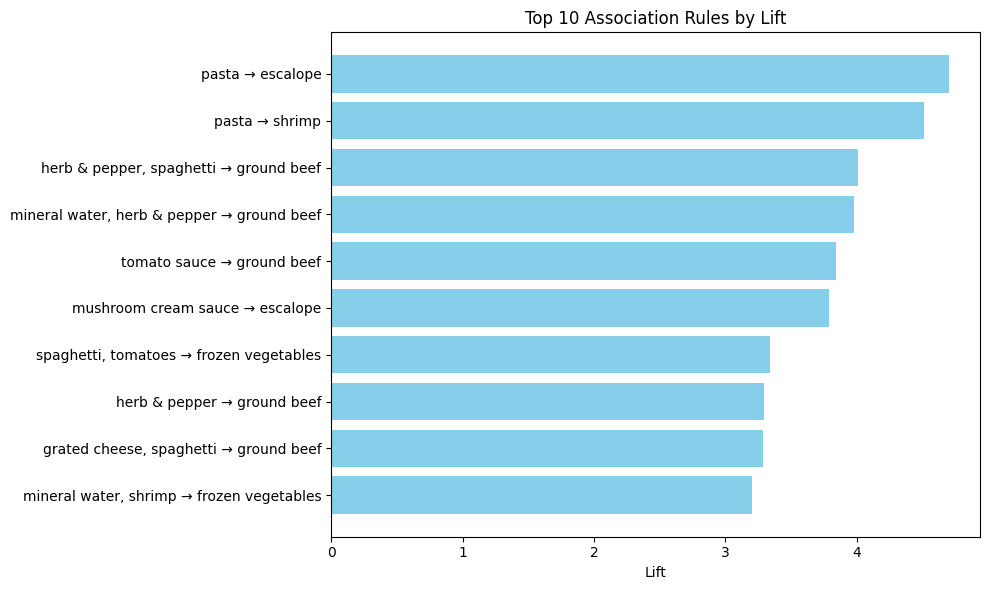

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(top10)), top10['lift'], color='skyblue')
plt.yticks(range(len(top10)), [f"{', '.join(list(a))} → {', '.join(list(c))}"
                                for a, c in zip(top10['antecedents'], top10['consequents'])])
plt.xlabel("Lift")
plt.title("Top 10 Association Rules by Lift")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Analysis and Interpretation

After applying the Apriori algorithm to the Online Retail dataset, I was able to generate association rules that show which products are often bought together by customers. I cleaned the data and used a minimum support value of 0.005, along with confidence above 0.3 and lift greater than 1. This helped in filtering out only the meaningful and strong rules.

Some of the interesting patterns I found are:

When customers buy pasta, they are likely to also buy escalope. This rule had a high lift value of 4.7, which means these two items are bought together much more often than by chance.

Another strong rule showed that when customers buy herb and pepper along with spaghetti, they also tend to buy ground beef. This kind of combination looks like ingredients for a recipe, which is useful for bundle offers or promotions.

I also found that customers who buy mineral water and shrimp often buy frozen vegetables as well. This could indicate health-conscious shopping behavior.

# **Interview Questions:**

1. What is lift and why is it important in association rules?

Lift tells us how much more likely two items are bought together compared to if they were bought independently. If the lift is more than 1, it means there is a strong relationship between the items. If the lift is close to 1, the items are not really related. Lift is important because it helps us find meaningful and interesting rules, not just common ones.


2. What is support and confidence? How do you calculate them?

Support shows how often two items appear together in the dataset. It is calculated by dividing the number of transactions that include both items by the total number of transactions.

Confidence tells us how likely it is that a customer will buy item B if they have already bought item A. It is calculated by dividing the number of transactions with both items by the number of transactions that have only item A.


3. What are some limitations or challenges of association rule mining?

One challenge is that it can generate too many rules, and most of them may not be useful. Another limitation is that it does not tell us whether one item causes the other to be bought. It can also be slow and require a lot of memory if the dataset is very large. Choosing the right values for support and confidence can be tricky, and the method does not consider how many units were bought or in what order.

